In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\marathi-ornamants.csv')

In [52]:
df.describe()

,Weight (grams),Length/Height (cm),Width (cm),Number of Components/Units,Number of Stones/Pearls,Carat Weight of Stones,Gold Purity (Karat)
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,896.00000
mean,58.958088,35.640861,3.349790,7.880252,33.554622,6.769748,21.96875
std,69.328232,28.094488,1.970775,20.932226,44.312236,10.660657,0.66444
min,3.900000,1.700000,0.700000,1.000000,0.000000,0.000000,18.00000
25%,15.650000,6.700000,1.900000,1.000000,2.000000,0.400000,22.00000
50%,41.700000,32.950000,2.650000,2.000000,16.500000,1.950000,22.00000
75%,75.225000,58.350000,5.000000,2.000000,46.000000,9.100000,22.00000
max,395.700000,99.000000,9.100000,106.000000,235.000000,53.900000,24.00000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ornament_Class              952 non-null    object 
 1   Weight (grams)              952 non-null    float64
 2   Length/Height (cm)          952 non-null    float64
 3   Width (cm)                  952 non-null    float64
 4   Number of Components/Units  952 non-null    int64  
 5   Number of Stones/Pearls     952 non-null    int64  
 6   Carat Weight of Stones      952 non-null    float64
 7   Gold Purity (Karat)         896 non-null    float64
 8   Primary Material            952 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 67.1+ KB


In [54]:
df.isnull().sum()

Ornament_Class                 0
Weight (grams)                 0
Length/Height (cm)             0
Width (cm)                     0
Number of Components/Units     0
Number of Stones/Pearls        0
Carat Weight of Stones         0
Gold Purity (Karat)           56
Primary Material               0
dtype: int64

In [55]:
df.isnull().values.any()

np.True_

In [56]:
df.isnull().mean() * 100

Ornament_Class                0.000000
Weight (grams)                0.000000
Length/Height (cm)            0.000000
Width (cm)                    0.000000
Number of Components/Units    0.000000
Number of Stones/Pearls       0.000000
Carat Weight of Stones        0.000000
Gold Purity (Karat)           5.882353
Primary Material              0.000000
dtype: float64

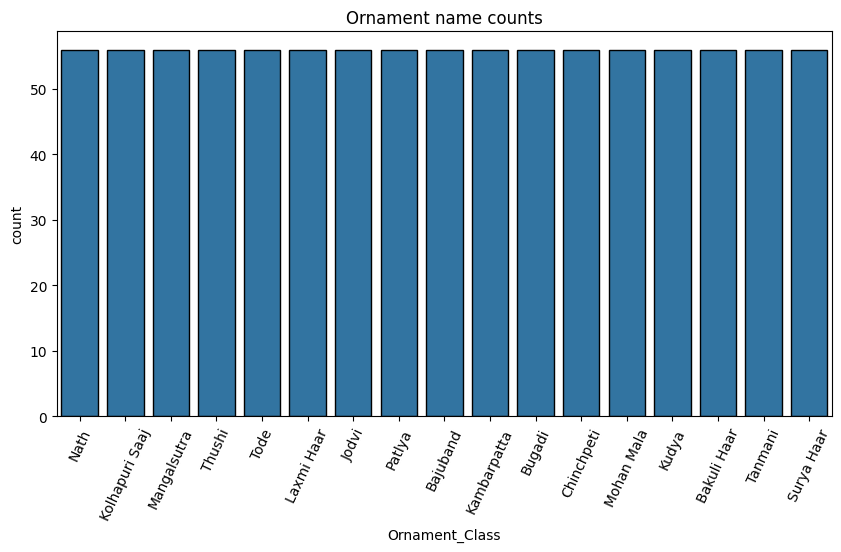

In [57]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['Ornament_Class'],order=df['Ornament_Class'].value_counts().index, edgecolor='black')  
plt.xticks(rotation=65)
plt.title("Ornament name counts")
plt.show()

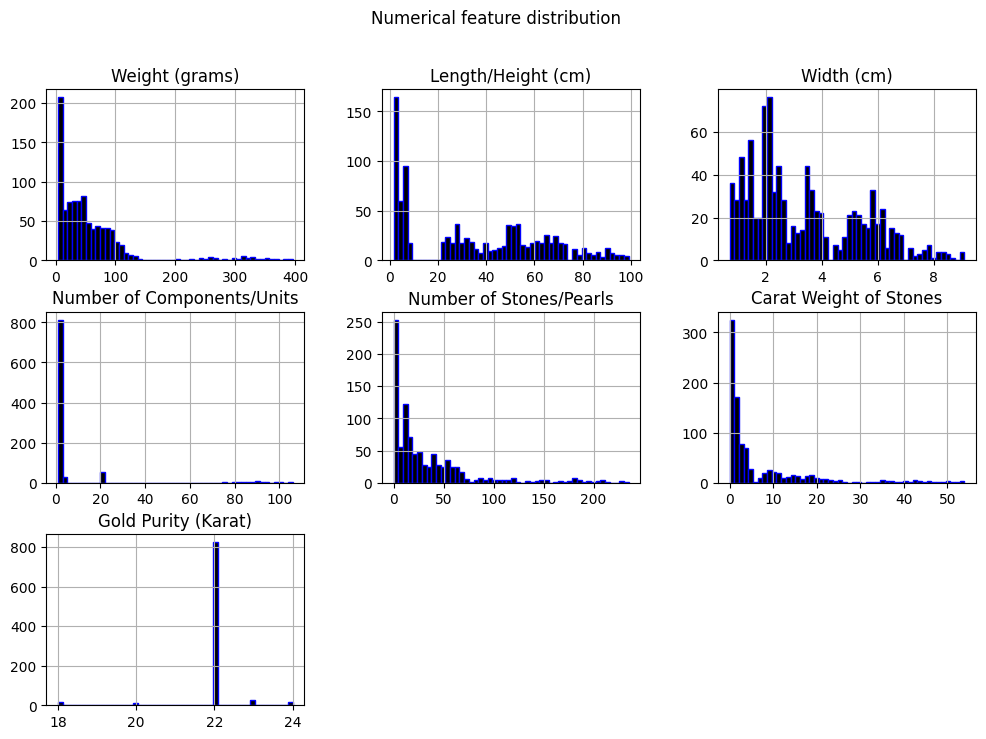

In [58]:
num_col = df.select_dtypes(include=np.number).columns
df[num_col].hist(bins=50,figsize=(12,8),color='black',edgecolor='blue')
plt.suptitle('Numerical feature distribution')
plt.show()

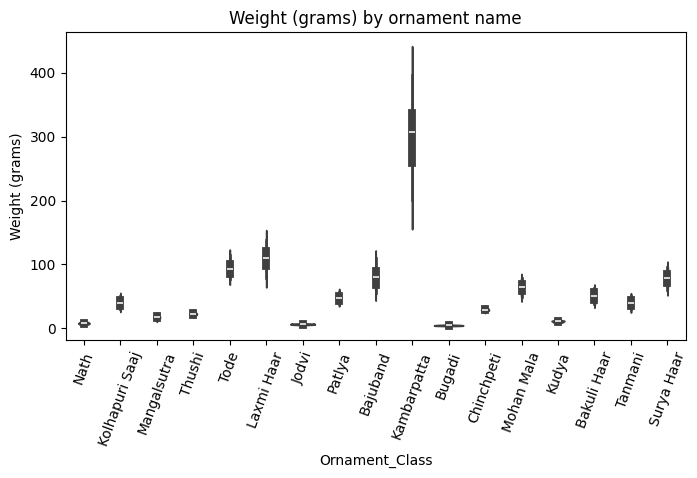

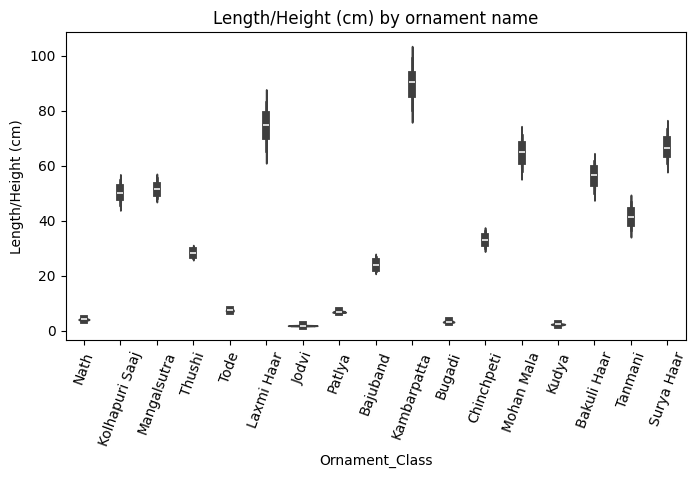

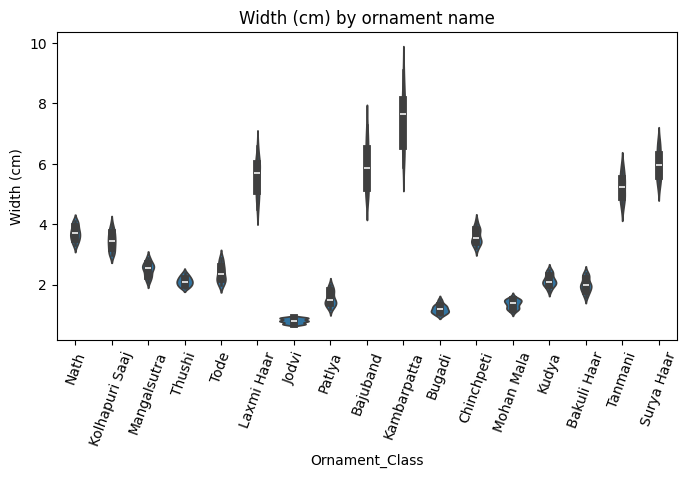

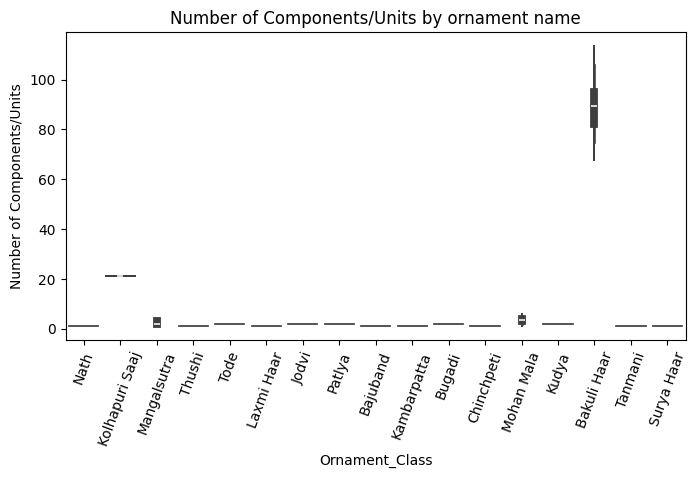

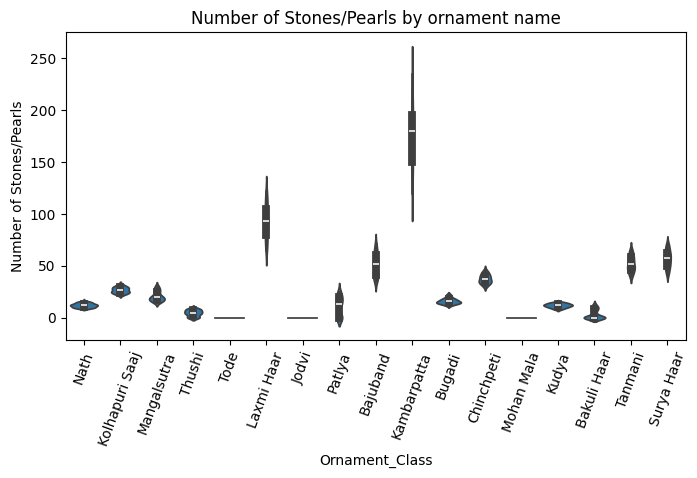

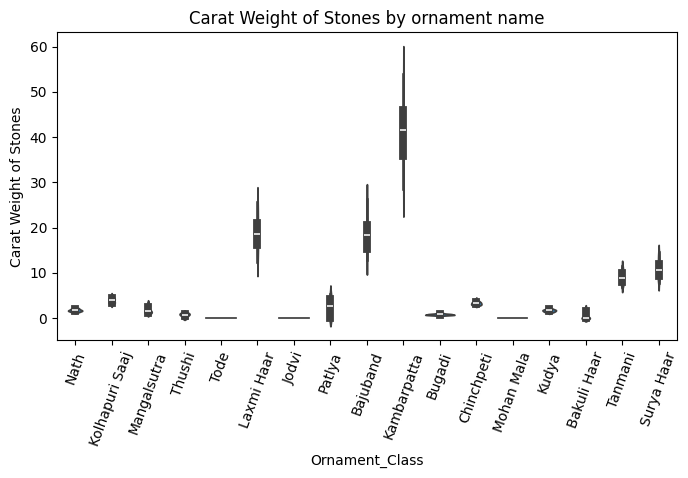

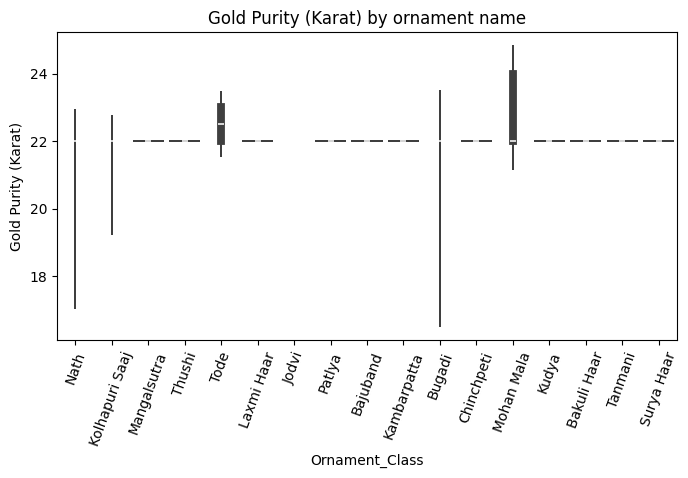

In [59]:
for col in num_col:
    plt.figure(figsize=(8,4))
    sns.violinplot(data=df, x=df['Ornament_Class'], y=col)
    plt.title(f'{col} by ornament name')
    plt.xticks(rotation=70)
    plt.show()

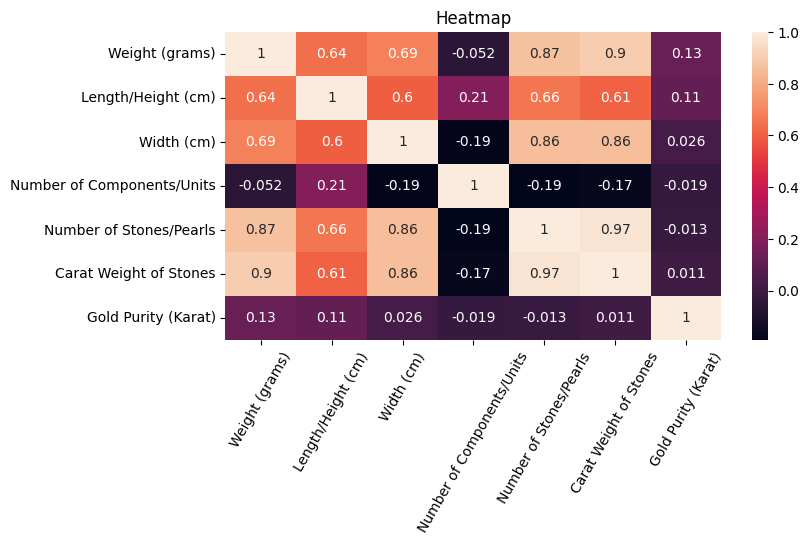

In [60]:
corr_m = df[num_col].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_m ,annot=True)
plt.title('Heatmap')
plt.xticks(rotation=60)
plt.show()

In [61]:
df = df.dropna()
df1 = df.drop('Primary Material', axis=1)
X = df1.drop('Ornament_Class',axis=1)
Y = df['Ornament_Class']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42, test_size=0.3)

In [64]:
log = LogisticRegression()
log.fit(x_train,y_train)

c:\Users\Admin\OneDrive\Documents\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
y_pred = log.predict(x_test)

In [66]:
print("Accuracy score: ", accuracy_score(y_pred, y_test))
print("F1 score: ", f1_score(y_pred, y_test,average='weighted'))
print("Precision score: ", precision_score(y_pred, y_test,average='weighted'))
print("Classification report: ", classification_report(y_pred, y_test))

Accuracy score:  1.0
F1 score:  1.0
Precision score:  1.0
Classification report:                  precision    recall  f1-score   support

      Bajuband       1.00      1.00      1.00        21
   Bakuli Haar       1.00      1.00      1.00        18
        Bugadi       1.00      1.00      1.00        16
    Chinchpeti       1.00      1.00      1.00        13
   Kambarpatta       1.00      1.00      1.00        17
Kolhapuri Saaj       1.00      1.00      1.00        20
         Kudya       1.00      1.00      1.00        19
    Laxmi Haar       1.00      1.00      1.00        16
   Mangalsutra       1.00      1.00      1.00        17
    Mohan Mala       1.00      1.00      1.00        15
          Nath       1.00      1.00      1.00        14
        Patlya       1.00      1.00      1.00        20
    Surya Haar       1.00      1.00      1.00        12
       Tanmani       1.00      1.00      1.00        19
        Thushi       1.00      1.00      1.00        15
          Tode       

In [67]:
print(f'Confusion matrix: {confusion_matrix(y_pred, y_test)}')

Confusion matrix: [[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [71]:
y_pred_knn = knn.predict(x_test)

In [ ]:
print("Accuracy score: ", accuracy_score(y_pred_knn, y_test))
print("F1 score: ", f1_score(y_pred_knn, y_test,average='weighted'))
print("Precision score: ", precision_score(y_pred_knn, y_test,average='weighted'))
print("Classification report: ", classification_report(y_pred_knn, y_test))

Accuracy score:  1.0
F1 score:  1.0
Precision score:  1.0
Classification report:                  precision    recall  f1-score   support

      Bajuband       1.00      1.00      1.00        21
   Bakuli Haar       1.00      1.00      1.00        18
        Bugadi       1.00      1.00      1.00        16
    Chinchpeti       1.00      1.00      1.00        13
   Kambarpatta       1.00      1.00      1.00        17
Kolhapuri Saaj       1.00      1.00      1.00        20
         Kudya       1.00      1.00      1.00        19
    Laxmi Haar       1.00      1.00      1.00        16
   Mangalsutra       1.00      1.00      1.00        17
    Mohan Mala       1.00      1.00      1.00        15
          Nath       1.00      1.00      1.00        14
        Patlya       1.00      1.00      1.00        20
    Surya Haar       1.00      1.00      1.00        12
       Tanmani       1.00      1.00      1.00        19
        Thushi       1.00      1.00      1.00        15
          Tode       

In [85]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred_d = model.predict(x_test)


In [87]:
print("Accuracy score: ", accuracy_score(y_pred_d, y_test))
print("F1 score: ", f1_score(y_pred_d, y_test,average='weighted'))
print("Precision score: ", precision_score(y_pred_d, y_test,average='weighted'))
print("Classification report: ", classification_report(y_pred_d, y_test))

Accuracy score:  1.0
F1 score:  1.0
Precision score:  1.0
Classification report:                  precision    recall  f1-score   support

      Bajuband       1.00      1.00      1.00        21
   Bakuli Haar       1.00      1.00      1.00        18
        Bugadi       1.00      1.00      1.00        16
    Chinchpeti       1.00      1.00      1.00        13
   Kambarpatta       1.00      1.00      1.00        17
Kolhapuri Saaj       1.00      1.00      1.00        20
         Kudya       1.00      1.00      1.00        19
    Laxmi Haar       1.00      1.00      1.00        16
   Mangalsutra       1.00      1.00      1.00        17
    Mohan Mala       1.00      1.00      1.00        15
          Nath       1.00      1.00      1.00        14
        Patlya       1.00      1.00      1.00        20
    Surya Haar       1.00      1.00      1.00        12
       Tanmani       1.00      1.00      1.00        19
        Thushi       1.00      1.00      1.00        15
          Tode       

Text(0.5, 1.0, 'Normalized Confusion Matrix — Decision Tree')

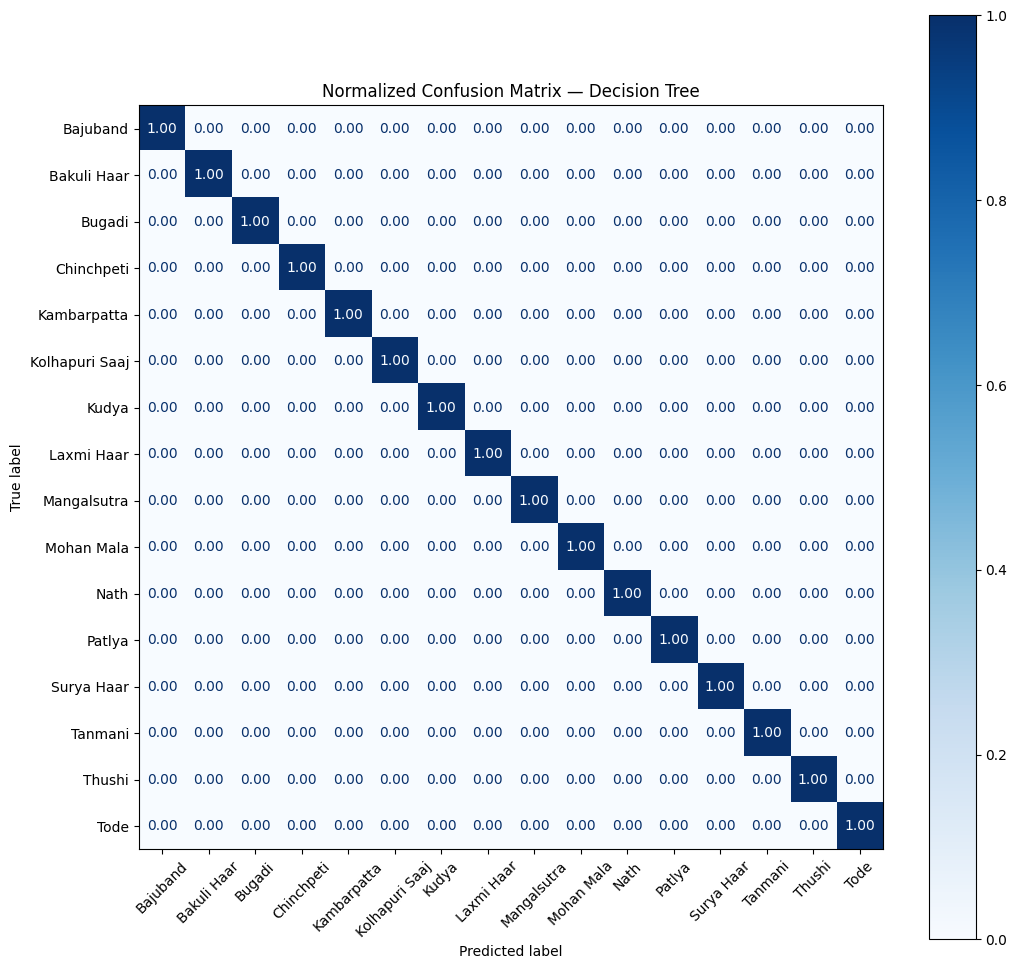

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test,y_pred_d,normalize="true" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax, colorbar=True)
plt.xticks(rotation=45)
plt.title("Normalized Confusion Matrix — Decision Tree")

Text(0.5, 1.0, 'Normalized Confusion Matrix — KNeighbour')

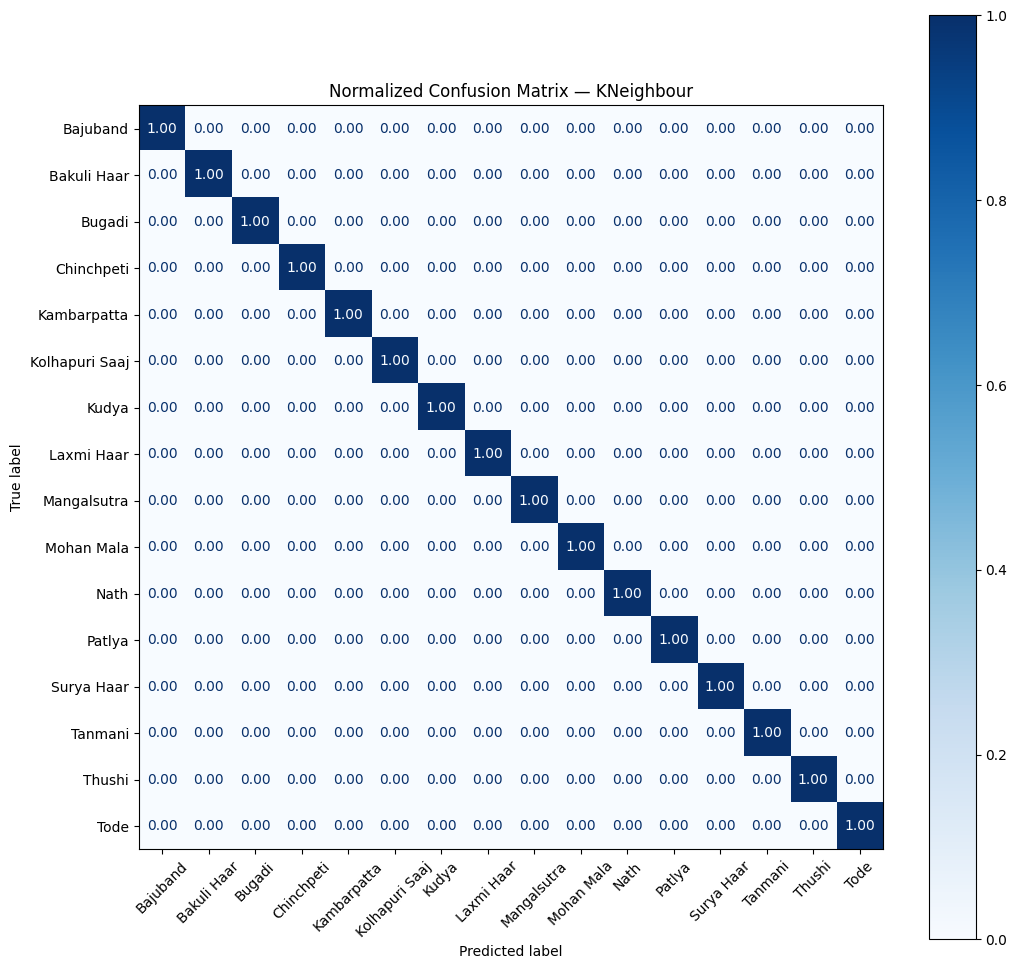

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test,y_pred_knn,normalize="true" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=knn.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax, colorbar=True)
plt.xticks(rotation=45)
plt.title("Normalized Confusion Matrix — KNeighbour")

Text(0.5, 1.0, 'Normalized Confusion Matrix — Logistic Regression')

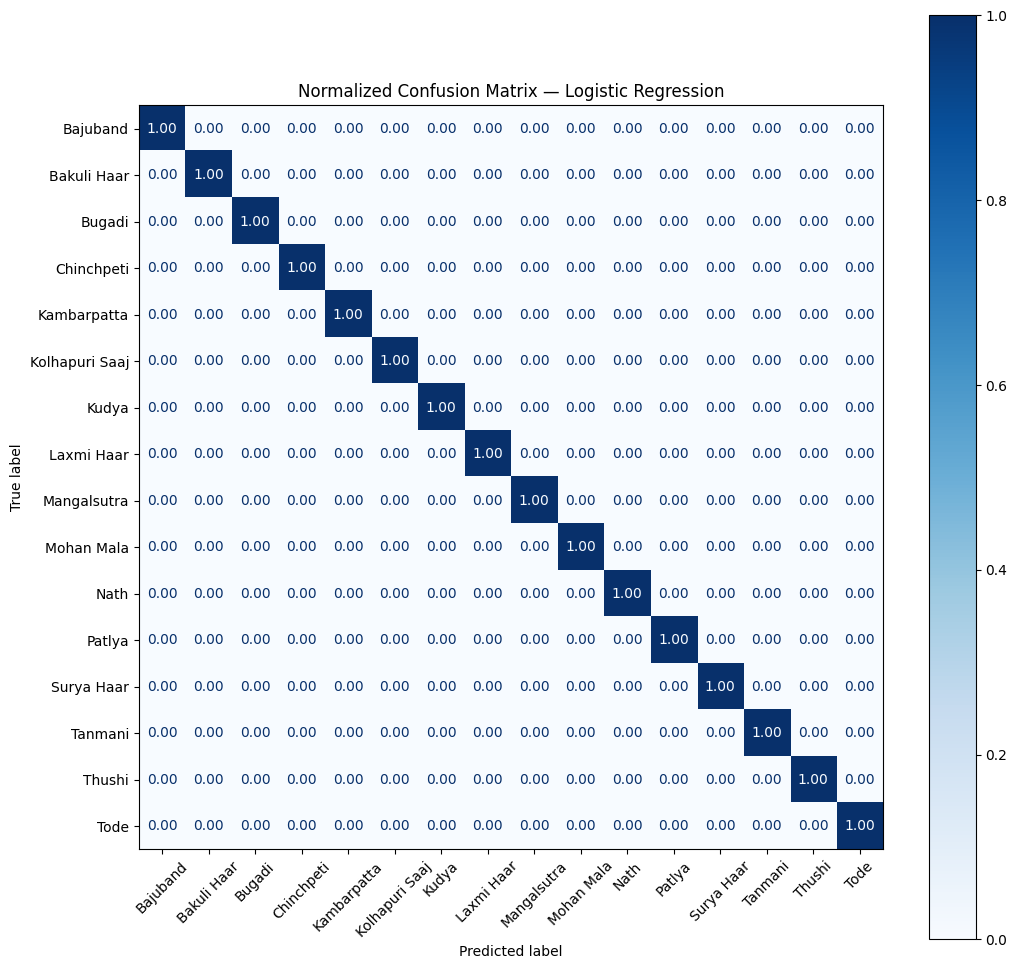

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test,y_pred,normalize="true" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=log.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, values_format=".2f", ax=ax, colorbar=True)
plt.xticks(rotation=45)
plt.title("Normalized Confusion Matrix — Logistic Regression")